In [1]:
# import eland official API
# check it on https://github.com/elastic/eland
import eland as ed

# other imports
import pandas as pd
import matplotlib.pyplot as plt

# import elasticsearch-py client
from elasticsearch import Elasticsearch

# Function for pretty-printing JSON
def json(raw):
    import json
    print(json.dumps(raw, indent=2, sort_keys=True))

In [2]:
df_data = pd.read_csv('churn_data.csv')
df_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Connect to an Elasticsearch instance
# here we use the official Elastic Python client
# check it on https://github.com/elastic/elasticsearch-py
es = Elasticsearch(
  ['http://localhost:9200'],
  http_auth=("elastic", "changeme")
)
# print the connection object info (same as visiting http://localhost:9200)
# make sure your elasticsearch node/cluster respond to requests
json(es.info())

{
  "cluster_name": "elasticsearch",
  "cluster_uuid": "czO6kvn5QPihz6R36w1qWQ",
  "name": "DESKTOP-Q85BIOJ",
  "tagline": "You Know, for Search",
  "version": {
    "build_date": "2020-12-05T01:00:33.671820Z",
    "build_flavor": "default",
    "build_hash": "1c34507e66d7db1211f66f3513706fdf548736aa",
    "build_snapshot": false,
    "build_type": "zip",
    "lucene_version": "8.7.0",
    "minimum_index_compatibility_version": "6.0.0-beta1",
    "minimum_wire_compatibility_version": "6.8.0",
    "number": "7.10.1"
  }
}


In [5]:
# Cleaning data following GIGO concept :
df_data = df_data[(df_data.TotalCharges != " ") & (df_data.TotalCharges != "No")]
df_data = df_data.astype({'TotalCharges': 'float64'})
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

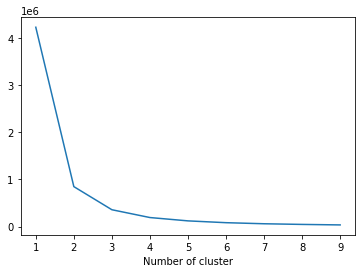

In [7]:
from sklearn.cluster import KMeans
to_cluster = df_data.filter(['tenure'])

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(to_cluster)
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [8]:
#k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(to_cluster)
df_data['TenureCluster'] = kmeans.predict(to_cluster)

#order the frequency cluster
df_data = order_cluster('TenureCluster', 'tenure',df_data,True)

#see details of each cluster
df_data.groupby('TenureCluster')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
TenureCluster,,,,,,,,
0,2930.0,7.830717,6.220431,1.0,2.0,6.0,13.0,21.0
1,1929.0,34.792120,8.297679,22.0,27.0,35.0,42.0,49.0
2,2173.0,63.475380,7.172433,50.0,57.0,65.0,70.0,72.0


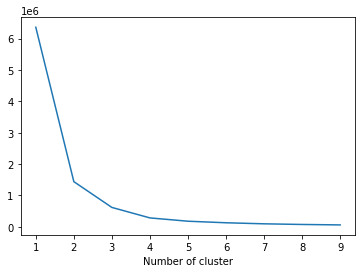

In [9]:
to_cluster = df_data.filter(['MonthlyCharges'])

sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(to_cluster)
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [10]:
#k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(to_cluster)
df_data['MonthlyChargesCluster'] = kmeans.predict(to_cluster)

#order the frequency cluster
df_data = order_cluster('MonthlyChargesCluster', 'MonthlyCharges',df_data,True)

#see details of each cluster
df_data.groupby('MonthlyChargesCluster')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
MonthlyChargesCluster,,,,,,,,
0,1886.0,23.389608,5.666778,18.25,19.80,20.4,25.05,42.40
1,2233.0,61.615517,10.438851,42.60,51.75,61.5,70.65,77.75
2,2913.0,94.047631,10.348042,77.80,85.05,93.9,101.90,118.75


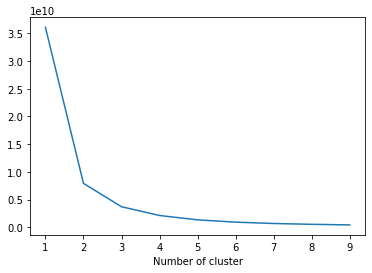

In [11]:
to_cluster = df_data.filter(['TotalCharges'])
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(to_cluster)
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [12]:
#k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(to_cluster)
df_data['TotalChargesCluster'] = kmeans.predict(to_cluster)

#order the frequency cluster
df_data = order_cluster('TotalChargesCluster', 'TotalCharges',df_data,True)

#see details of each cluster
df_data.groupby('TotalChargesCluster')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
TotalChargesCluster,,,,,,,,
0,4178.0,691.820440,577.143887,18.8,162.3375,541.325,1149.65,2001.0
1,1612.0,3303.045192,817.669328,2001.5,2570.1500,3245.425,4010.35,4816.7
2,1242.0,6313.392955,994.806584,4818.8,5499.2500,6163.300,7051.40,8684.8


In [13]:
df_data.filter(["TenureCluster","MonthlyChargesCluster","TotalChargesCluster"]).sample(5)

,TenureCluster,MonthlyChargesCluster,TotalChargesCluster
2119,0,1,0
6486,2,2,2
3740,0,2,0
5680,1,2,1
1069,1,0,0


In [14]:
df_data['TenureCluster'] = df_data["TenureCluster"].replace({0:'Low',1:'Mid',2:'High'})
df_data['MonthlyChargesCluster'] = df_data["MonthlyChargesCluster"].replace({0:'Low',1:'Mid',2:'High'})
df_data['TotalChargesCluster'] = df_data["TotalChargesCluster"].replace({0:'Low',1:'Mid',2:'High'})
df_data.filter(["TenureCluster","MonthlyChargesCluster","TotalChargesCluster"]).sample(5)

,TenureCluster,MonthlyChargesCluster,TotalChargesCluster
4242,Mid,Mid,Mid
2587,Low,Mid,Low
5966,High,High,High
6897,High,High,High
5791,High,Mid,High


In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customerID             7032 non-null   object 
 1   gender                 7032 non-null   object 
 2   SeniorCitizen          7032 non-null   int64  
 3   Partner                7032 non-null   object 
 4   Dependents             7032 non-null   object 
 5   tenure                 7032 non-null   int64  
 6   PhoneService           7032 non-null   object 
 7   MultipleLines          7032 non-null   object 
 8   InternetService        7032 non-null   object 
 9   OnlineSecurity         7032 non-null   object 
 10  OnlineBackup           7032 non-null   object 
 11  DeviceProtection       7032 non-null   object 
 12  TechSupport            7032 non-null   object 
 13  StreamingTV            7032 non-null   object 
 14  StreamingMovies        7032 non-null   object 
 15  Cont

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df_data.columns:
    if df_data[column].dtype == object and column != 'customerID':
        if df_data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_data[column] = le.fit_transform(df_data[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_data = pd.get_dummies(data = df_data,columns = dummy_columns)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int32  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int32  
 4   Dependents                               7032 non-null   int32  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int32  
 7   PaperlessBilling                         7032 non-null   int32  
 8   MonthlyCharges                           7032 non-null   float64
 9   TotalCharges                             7032 non-null   float64
 10  Churn                                    7032 no

In [20]:
df_data[['gender','Partner','TenureCluster_High','TenureCluster_Low','TenureCluster_Mid']].head()

,gender,Partner,TenureCluster_High,TenureCluster_Low,TenureCluster_Mid
0,0,1,0,1,0
1,0,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,1,0,1,0


In [22]:
el_data = ed.pandas_to_eland(df_data,es,"es-churn",es_if_exists="replace",es_refresh=True)